<a href="https://colab.research.google.com/github/George7531/for_machine_learning/blob/main/ml/Learnings/deep_learning_tool_kits/Deep_RL/policy_gradient_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# day 375

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/thumbnail.png)

* In deep q-learing, a value-based deep reinforcement learning algorithm, we used a deep neural network to approximate the different Q-values for each possible action at a state.


![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/link-value-policy.jpg)

* In value-based methods, the policy (π) only exists because of the action value estimates since the policy is just a function (for instance, greedy-policy) that will select the action with the highest value given a state.

* With policy-based methods, we want to optimize the policy directly without having an intermediate step of learning a value function.

* So now, we’ll learn about policy-based methods and study a subset of these methods called policy gradient. Then we’ll implement our first policy gradient algorithm called Monte Carlo Reinforcement algorithm from scratch using PyTorch. Then, we’ll test its robustness using the CartPole-v1 and PixelCopter environments.

## what are policy based methods:
* The main goal of Reinforcement learning is to find the optimal policy $𝜋^∗$ that will maximize the expected cumulative reward. Because Reinforcement Learning is based on the reward hypothesis: all goals can be described as the maximization of the expected cumulative reward.

* For instance, in a soccer game (where you’re going to train the agents in two units), the goal is to win the game. We can describe this goal in reinforcement learning as maximizing the number of goals scored (when the ball crosses the goal line) into your opponent’s soccer goals. And minimizing the number of goals in your soccer goals.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/soccer.jpg)

# value-based, policy-based and actor critic method:
* In the first unit, we saw two methods to find (or, most of the time, approximate) this optimal policy $ 𝜋^∗ $.

* In value-based methods, we learn a value function.The idea is that an optimal value function leads to an optimal policy
$ 𝜋^∗ $ .
* Our objective is to minimize the loss between the predicted and target value to approximate the true action-value function.
* We have a policy, but it's implicit since it is generated directly from the value function. For instance, in Q-Learning, we used an (epsilon-)greedy policy.

* On the other hand, in policy-based methods, we directly learn to approximate
$ 𝜋^∗ $ without having to learn a value function.

* The idea is to parameterize the policy. For instance, using a neural network $ 𝜋_{\theta} $, this policy will output a probability distribution over actions (stochastic policy).

![sff](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/stochastic_policy.png)

* Our objective then is to maximize the performance of the parameterized policy using gradient ascent.
* To do that, we control the parameter 𝜃 that will affect the distribution of actions over a state.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_based.png)
* Next time, we'll study the actor-critic method, which is a combination of value-based and policy-based methods.


## Difference between Policy based method and Policy gradient method:

* Policy-gradient methods, what we’re going to study in this unit, is a subclass of policy-based methods. In policy-based methods, the optimization is most of the time on-policy since for each update, we only use data (trajectories) collected by our most recent version of $ 𝜋_{𝜃} $


* The difference between these two methods lies on how we optimize the parameter:

  1. In policy-based methods, we search directly for the optimal policy. We can optimize the parameter $ \theta $ indirectly by maximizing the local approximation of the objective function with techniques like hill climbing, simulated annealing, or evolution strategies.
  2. In policy-gradient methods, because it is a subclass of the policy-based methods, we search directly for the optimal policy. But we optimize the parameter 𝜃 directly by performing the gradient ascent on the performance of the objective function.
  

## Advantages and Disadvantages of policy gradient methods:
* Before diving more into how policy-gradient methods work (the objective function, policy gradient theorem, gradient ascent, etc.), let’s study the advantages and disadvantages of policy-based methods.

### Advantages:
1. The simplicity of integration: we can directly estimate the policy without storing the additional data(Action values).

2. Policy-gradient methods can learn a stochastic policy
Policy-gradient methods can learn a stochastic policy while value functions can’t.

  This has two consequences:

    1. we don’t need to implement an exploration/exploitation trade-off by hand. Since we output a probability distribution over actions, the agent explores the state space without always taking the same trajectory.

    2. We also get rid of the problem of perceptual aliasing. Perceptual aliasing is when two states seem (or are) the same but need different actions.

Let’s take an example: we have an intelligent vacuum cleaner whose goal is to suck the dust and avoid killing the hamsters.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster1.jpg)


* Our vacuum cleaner can only perceive where the walls are.

* The problem is that the two red (colored) states are aliased states(in one you have to move left to and another you have to right to), because the agent perceives an upper and lower wall for each.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster2.jpg)

* Under a deterministic policy, the policy will either always move right when in a red state or always move left. Either case will cause our agent to get stuck and never suck the dust. perhaps this may have caused our shooting space agent to move from enemies gunfire in an attempt to evade their attack to maximize the game score but never did it once shoot back at the enemies.

* Under a value-based Reinforcement learning algorithm, we learn a quasi-deterministic policy (“greedy epsilon strategy”). Consequently, our agent can spend a lot of time before finding the dust.

* On the other hand, an optimal stochastic policy will randomly move left or right in red (colored) states. Consequently, it will not be stuck and will reach the goal state with a high probability.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster3.jpg)


3. Policy-gradient methods are more effective in high-dimensional action spaces and continuous actions spaces:

  * The problem with Deep Q-learning is that their predictions assign a score (maximum expected future reward) for each possible action, at each time step, given the current state.

  * But what if we have an infinite possibility of actions?

  * for instance, with a self-driving car, at each state, you can have a (near) infinite choice of actions (turning the wheel at 15°, 17.2°, 19,4°, honking, etc.). We’ll need to output a Q-value for each possible action! And taking the max action of a continuous output is an optimization problem itself!

  * Instead, with policy-gradient methods, we output a probability distribution over actions.


4. Q value function aggressively chooses values that will not be very good in a continous action space where subtelity is required:

  * Policy-gradient methods have better convergence properties
  In value-based methods, we use an aggressive operator to change the value function: we take the maximum over Q-estimates. Consequently, the action probabilities may change dramatically for an arbitrarily small change in the estimated action values if that change results in a different action having the maximal value.

  * For instance, if during the training, the best action was left (with a Q-value of 0.22) and the training step after it’s right (since the right Q-value becomes 0.23), we dramatically changed the policy since now the policy will take most of the time right instead of left.

  * on the other hand, in policy-gradient methods, stochastic policy action preferences (probability of taking action) change smoothly over time.


### Disadvantages:
 Naturally, policy-gradient methods also have some disadvantages:

    * Frequently, policy-gradient methods converges to a local maximum instead of a global optimum.
    * Policy-gradient goes slower, step by step: it can take longer to train (inefficient).
    * Policy-gradient can have high variance. We’ll see in the actor-critic unit why, and how we can solve this problem.

  # monte carlo reinforce:
  * Monte Carlo Reinforce: A policy-gradient algorithm that uses an estimated return from an entire episode to update the policy parameter.


# Diving Deeper into policy gradient method:


## The big picture:
* We just learned that policy-gradient methods aim to find parameters 𝜃 that maximize the expected return.

* The idea is that we have a parameterized stochastic policy. In our case, a neural network outputs a probability distribution over actions. The probability of taking each action is also called the action preference.

If we take the example of CartPole-v1:

    * As input, we have a state.
    * As output, we have a probability distribution over actions at that state.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_based.png)

* Our goal with policy-gradient is to control the probability distribution of actions by tuning the policy such that good actions (that maximize the return) are sampled more frequently in the future. Each time the agent interacts with the environment, we tweak the parameters such that good actions will be sampled more likely in the future.

### But how are we going to optimize the weights using the expected return?

* The idea is that we’re going to let the agent interact during an episode. And if we win the episode, we consider that each action taken was good and must be more sampled in the future since they lead to win.

* So for each state-action pair, we want to increase the
P(a∣s): the probability of taking that action at that state. Or decrease if we lost.

* The Policy-gradient algorithm (simplified) looks like this:
![fsfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/pg_bigpicture.jpg)

* Now that we got the big picture, let’s dive deeper into policy-gradient methods.


## Diving Deeper into Policy Gradient Methods:
* We have our stochastic policy 𝜋 which has a parameter 𝜃.This π, given a state, outputs a probability distribution of actions.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/stochastic_policy.png)

* But how do we know if our policy is good? We need to have a way to measure it. To know that, we define a score/objective function called $ J(\theta)$ .


### The Objective Function:
* The objective function gives us the performance of the agent given a trajectory (state action sequence without considering reward (contrary to an episode)), and it outputs the expected cumulative reward.

![sfsddf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/objective.jpg)

* let's give some detail on this formula:
* The expected return (also called expected cumulative reward), is the weighted average (where the weights are given by P(τ:Θ) of all possible values that return R(τ) can take.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/expected_reward.png)

* R(τ) : Return from an arbitrary trajectory. To take this quantity and use it to calculate the expected return, we need to multiply it by the probability of each possible trajectory.

* P(τ;θ) : Probability of each possible trajectory τ (that probability depends on θ since it defines the policy that it uses to select the actions of the trajectory which has an impact of the states visited).

![ssfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)

* J(θ) : Expected return, we calculate it by summing for all trajectories, the probability of taking that trajectory given θ multiplied by the return of this trajectory.

* Our objective then is to maximize the expected cumulative reward by finding the θ that will output the best action probability distributions

* θ will output the best action probability distributions.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/max_objective.png)


### Gradient Ascent and Policy Gradient Theorem:

[To understand Gradient Descent and Gradient Ascent check this out!!!](https://www.baeldung.com/cs/gradient-descent-vs-ascent)


* Policy-gradient is an optimization problem: we want to find the values of θ that maximize our objective function
J(θ), so we need to use gradient-ascent. It’s the inverse of gradient-descent since it gives the direction of the steepest increase of J(θ).
* Our update step for gradient-ascent is:
$ θ←θ+α∗∇_{\theta}J(θ)$ We can repeatedly apply this update in the hopes that θ converges to the value that maximizes J(θ).

* However, there are two problems with computing the derivative of J(θ):

* We can’t calculate the true gradient of the objective function since it requires calculating the probability of each possible trajectory, which is computationally super expensive. So we want to calculate a gradient estimation with a sample-based estimate (collect some trajectories).

* We have another problem that I explain in the next optional section. To differentiate this objective function, we need to differentiate the state distribution, called the `Markov  Decision Process dynamics`. This is attached to the environment. It gives us the probability of the environment going into the next state, given the current state and the action taken by the agent. The problem is that we can’t differentiate it because we might not know about it.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)

* Fortunately we’re going to use a solution called the Policy Gradient Theorem that will help us to reformulate the objective function into a differentiable function that does not involve the differentiation of the state distribution.

* If you want to understand how we derive this formula for approximating the gradient, keep on reading. I will discuss it on the next cell.

## The Reinforce algorithm(Monte Carlo Reinforce):
* The Reinforce algorithm, also called Monte-Carlo policy-gradient, is a policy-gradient algorithm that uses an estimated return from an entire episode(Trajectory(tau)) to update the policy parameter θ:

* In a loop:

    1. Use the policy $π_θ$ to collect an episode τ

    2. Use the episode to estimate the gradient $\hat{g}=∇_θ J(θ)$

    ![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_gradient_one.png)

    3. Update the weights of the policy: $θ←θ+α*\hat{g}$


#### Explanation:
* $∇_{\theta}logπ_{\theta}(a_t|s_t)R(\tau) \Rightarrow $ is the direction of steepest increase of the (log) probability of selecting action $a_t$ from state $s_t$ . This tells us how we should change the weights of policy if we want to increase/decrease the log probability of selecting action $a_t$ from the state $s_t$

* R(τ): is the scoring function:
    1. If the return is high, it will push up the probabilities of the (state, action) combinations.
    2. Otherwise, if the return is low, it will push down the probabilities of the (state, action) combinations.


### Multiple Trajectories:
* We can also collect multiple episodes (trajectories) to estimate the gradient:
![fsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_gradient_multiple.png)
      
















# Policy Gradient Theorem(Extra deep explanation):

* we’re going to study how we differentiate the objective function that we will use to approximate the policy gradient.

1. The objective function:
![sfsdf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/expected_reward.png)

![fsdf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


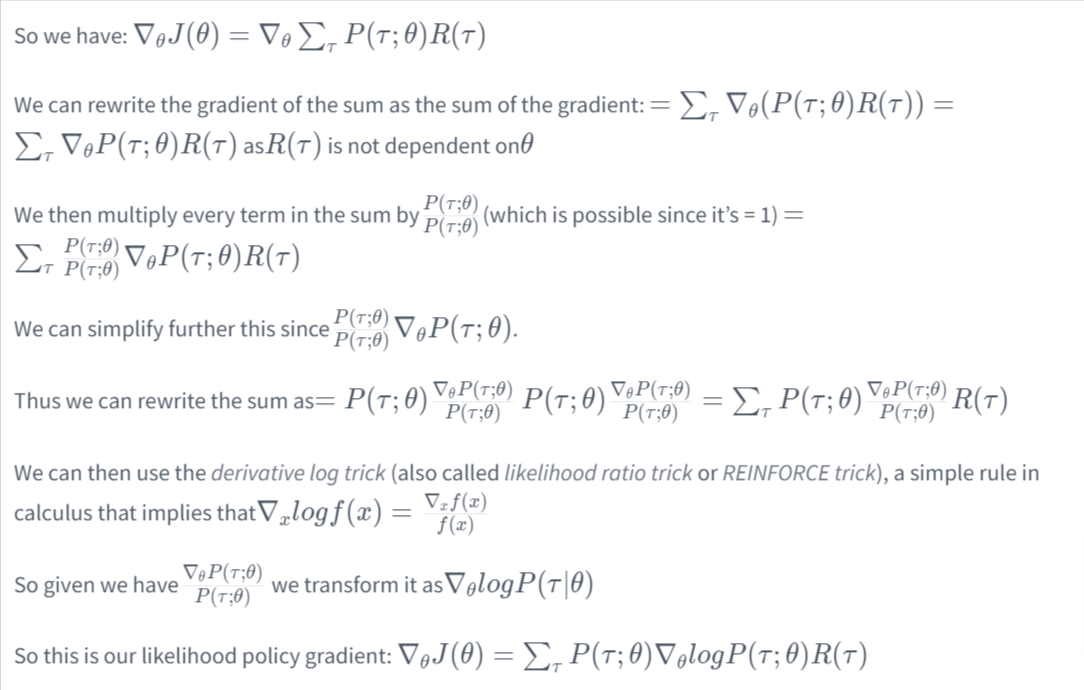

In [ ]:
from PIL import Image

Image.open('/content/drive/MyDrive/images/040624_rl.png')

 The last two parts of the derivation I'm having difficulty with are hence got help from claude 3:

1. We can simplify further this since $\frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta)$.

2. Thus we can rewrite the sum as $= P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} = \sum_\tau P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} R(\tau)$

## simplification:

1. The first part is a simplification step. In the previous line, they had:
   $\sum_\tau \frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) R(\tau)$
   
   Notice that they have a fraction $\frac{P(\tau;\theta)}{P(\tau;\theta)}$. This fraction is always equal to 1 because any number divided by itself is 1 (as long as it's not 0, and probabilities can't be 0 in this context). So, they're pointing out that this term can be simplified:
   
   $\frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) = 1 \times \nabla_\theta P(\tau; \theta) = \nabla_\theta P(\tau; \theta)$
   
   This makes the expression simpler without changing its value.

2. The second part is more complex. They're rewriting the expression in a clever way to introduce the term $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$. This term is known as the "score function" in statistics and is a key component in policy gradient methods in reinforcement learning.

   They start with $\nabla_\theta P(\tau; \theta)$ from the previous simplification. Then they multiply and divide by $P(\tau; \theta)$ to create this score function:
   
   $\nabla_\theta P(\tau; \theta) = \frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) = P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$
   
   This is a valid operation because, again, $\frac{P(\tau;\theta)}{P(\tau;\theta)} = 1$, so we're not changing the value. But now we have the score function $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$ which has nice properties in policy gradient methods.

   Applying this to each term in the sum:
   $\sum_\tau P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} R(\tau)$
   
   This form is particularly useful because:
   1. $P(\tau; \theta)$ can be seen as the probability of sampling the trajectory $\tau$ under the current policy.
   2. $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$ is the score function, which tells us how to adjust our policy parameters to make this trajectory more or less likely.
   3. $R(\tau)$ is the reward of this trajectory, which tells us whether we want to make this trajectory more likely (if reward is high) or less likely (if reward is low).

* they're rewriting the expression to introduce the score function, which is a key concept in policy gradient methods. This form makes it clearer how to update the policy: increase the probability of high-reward trajectories and decrease the probability of low-reward trajectories.

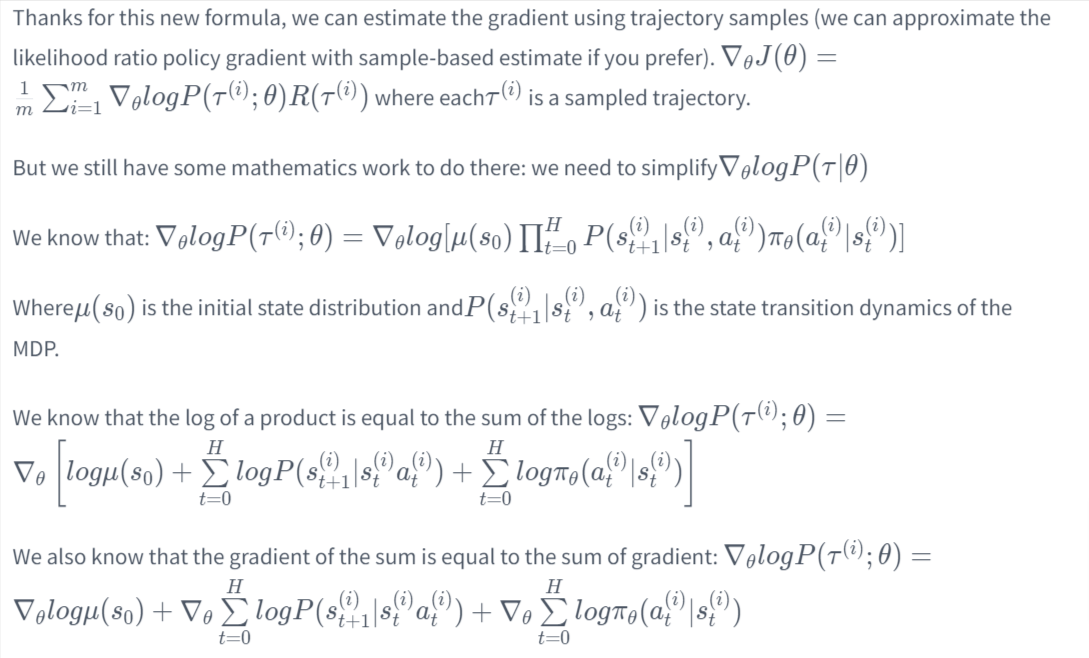

In [ ]:
Image.open('/content/drive/MyDrive/images/040624_rl1.png')

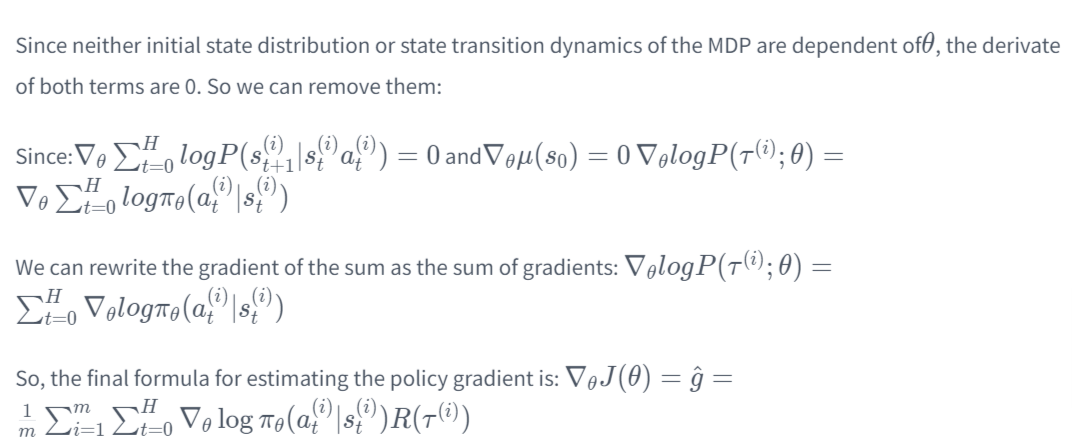

In [ ]:
Image.open('/content/drive/MyDrive/images/040624_rl2.png')

# Code:

* let's create a reinforce agent with pytorch!!!


![sfsdfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/envs.gif)


* Reinforce is a Policy-based method: a Deep Reinforcement Learning algorithm that tries to optimize the policy directly without using an action-value function.

* More precisely, Reinforce is a Policy-gradient method, a subclass of Policy-based methods that aims to optimize the policy directly by estimating the weights of the optimal policy using gradient ascent.

* To test its robustness, we're going to train it in 2 different simple environments:

1. Cartpole-v1
2. PixelcopterEnv

In [ ]:
# create a virtual screen
%%capture
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip install pyvirtualdisplay
!pip install pyglet==1.5.1

In [ ]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Install the dependencies 🔽
The first step is to install the dependencies. We’ll install multiple ones:

- `gym`
- `gym-games`: Extra gym environments made with PyGame.
- `huggingface_hub`: 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations, and other features that will allow you to easily collaborate with others.

In [ ]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit4/requirements-unit4.txt

  Cloning https://github.com/ntasfi/PyGame-Learning-Environment.git to /tmp/pip-req-build-in83kag4
  Running command git clone --filter=blob:none --quiet https://github.com/ntasfi/PyGame-Learning-Environment.git /tmp/pip-req-build-in83kag4
  Resolved https://github.com/ntasfi/PyGame-Learning-Environment.git to commit 3dbe79dc0c35559bb441b9359948aabf9bb3d331
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/simoninithomas/gym-games to /tmp/pip-req-build-nz3sh2ji
  Running command git clone --filter=blob:none --quiet https://github.com/simoninithomas/gym-games /tmp/pip-req-build-nz3sh2ji
  Resolved https://github.com/simoninithomas/gym-games to commit f31695e4ba028400628dc054ee8a436f28193f0b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for ple: filename=ple-0.0.1-py3-none-any.whl size=50769 sha256=dedd05d6f5c5ffe3d4532cdeb4e6c1a08e82a8ecaa6a0a55800a85430c662d95
  Stored in di

## Import the packages 📦
In addition to import the installed libraries, we also import:

- `imageio`: A library that will help us to generate a replay video



In [ ]:
import numpy as np

from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

# Gym
import gym
import gym_pygame

# Hugging Face Hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
import imageio

In [ ]:
# device agnostic code!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


device(type='cpu')

We're now ready to implement our Reinforce algorithm 🔥

# First agent: Playing CartPole-v1 🤖

## Create the CartPole environment and understand how it works
### [The environment 🎮](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)


### Why do we use a simple environment like CartPole-v1?
As explained in [Reinforcement Learning Tips and Tricks](https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html), when you implement your agent from scratch you need **to be sure that it works correctly and find bugs with easy environments before going deeper**. Since finding bugs will be much easier in simple environments.


> Try to have some “sign of life” on toy problems


> Validate the implementation by making it run on harder and harder envs (you can compare results against the RL zoo). You usually need to run hyperparameter optimization for that step.
___
### The CartPole-v1 environment

> A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.



So, we start with CartPole-v1. The goal is to push the cart left or right **so that the pole stays in the equilibrium.**

The episode ends if:
- The pole Angle is greater than ±12°
- Cart Position is greater than ±2.4
- Episode length is greater than 500

We get a reward 💰 of +1 every timestep the Pole stays in the equilibrium.

In [ ]:
env_id = 'CartPole-v1'

# create the environment:
env = gym.make(env_id,new_step_api=True)

# create the evaluation environment:
eval_env = gym.make(env_id,new_step_api=True)

# get the size of observation_space and action_space:
size_of_action_space = env.action_space.n
size_of_observation_space = env.observation_space.shape

In [ ]:
print('shape of observation space: {}'.format(size_of_observation_space))
print('sample observation: {}'.format(env.observation_space.sample())) # a random observation it displays
print('shape of action space: {}'.format(size_of_action_space))
print('sample action: {}'.format(env.action_space.sample())) # a random action is chosen and displayed.


shape of observation space: (4,)
sample observation: [ 9.7432476e-01  2.7043835e+38  6.1727550e-02 -1.5516052e+38]
shape of action space: 2
sample action: 0


## Let's build the Reinforce Architecture
This implementation is based on two implementations:
- [PyTorch official Reinforcement Learning example](https://github.com/pytorch/examples/blob/main/reinforcement_learning/reinforce.py)
- [Udacity Reinforce](https://github.com/udacity/deep-reinforcement-learning/blob/master/reinforce/REINFORCE.ipynb)
- [Improvement of the integration by Chris1nexus](https://github.com/huggingface/deep-rl-class/pull/95)

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/reinforce.png" alt="Reinforce"/>

In [ ]:
torch.nn.Linear(3,3)

Linear(in_features=3, out_features=3, bias=True)

In [ ]:
np.finfo(np.float32).eps.item()

1.1920928955078125e-07

In [ ]:
a = [1,2,3,4,5]

del a

In [ ]:
a

NameError: name 'a' is not defined

In [ ]:
from collections import deque

deque(maxlen=100)

deque([])

So we want:
- Two fully connected layers (fc1 and fc2).
- Using ReLU as activation function of fc1
- Using Softmax to output a probability distribution over actions

In [ ]:
class Policy(nn.Module):
    def __init__(self, s_size, a_size, h_size):
        super(Policy, self).__init__()
        # Create two fully connected layers
        self.fc1 = torch.nn.Linear(in_features=s_size,out_features=h_size)
        self.fc2 = torch.nn.Linear(in_features=h_size,out_features=a_size)
        self.dropout = torch.nn.Dropout(p=0.2)



    def forward(self, x):
        # Define the forward pass
        # state goes to fc1 then we apply ReLU activation function
        x = self.fc1(x)
        x = self.dropout(x)
        x = F.relu(x)
        x = self.fc2(x)

        return F.softmax(x,dim=1)

        # fc1 outputs goes to fc2

        # We output the softmax

    def act(self, state):
        """
        Given a state, take action
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        m = Categorical(probs)
        action = np.argmax(m)
        return action.item(), m.log_prob(action)

I make a mistake, can you guess where?

- To find out let's make a forward pass:

In [ ]:
debug_policy = Policy(s_size=4, a_size=2, h_size=64).to(device)
debug_policy.act(env.reset())

ValueError: The value argument to log_prob must be a Tensor

- Here we see that the error says `ValueError: The value argument to log_prob must be a Tensor`

- It means that `action` in `m.log_prob(action)` must be a Tensor **but it's not.**

- Do you know why? Check the act function and try to see why it does not work.

Advice 💡: Something is wrong in this implementation. Remember that we act function **we want to sample an action from the probability distribution over actions**.


In [ ]:
class Policy(nn.Module):
    def __init__(self, s_size, a_size, h_size):
        super(Policy, self).__init__()
        # Create two fully connected layers
        self.fc1 = torch.nn.Linear(in_features=s_size,out_features=h_size)
        self.fc2 = torch.nn.Linear(in_features=h_size,out_features=a_size)
        self.dropout = torch.nn.Dropout(p=0.2)



    def forward(self, x):
        # Define the forward pass
        # state goes to fc1 then we apply ReLU activation function
        # fc1 outputs goes to fc2
        # We output the softmax

        x = self.fc1(x)
        x = self.dropout(x)
        x = torch.nn.functional.relu(x)
        x = self.fc2(x)

        return torch.nn.functional.softmax(x,dim=1)

    def act(self, state):
        """
        Given a state, take action
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state).cpu()
        m = Categorical(probs)
        action = m.sample()
        return action.item(), m.log_prob(action)

In [ ]:
debug_policy = Policy(s_size=4, a_size=2, h_size=64).to(device)
debug_policy.act(env.reset())

(1, tensor([-0.7358], grad_fn=<SqueezeBackward1>))

By using CartPole, it was easier to debug since **we know that the bug comes from our integration and not from our simple environment**.

- Since **we want to sample an action from the probability distribution over actions**, we can't use `action = np.argmax(m)` since it will always output the action that have the highest probability.

- We need to replace with `action = m.sample()` that will sample an action from the probability distribution P(.|s)

### Let's build the Reinforce Training Algorithm
This is the Reinforce algorithm pseudocode:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/pg_pseudocode.png" alt="Policy gradient pseudocode"/>
  

- When we calculate the return Gt (line 6) we see that we calculate the sum of discounted rewards **starting at timestep t**.

- Why? Because our policy should only **reinforce actions on the basis of the consequences**: so rewards obtained before taking an action are useless (since they were not because of the action), **only the ones that come after the action matters**.

- Before coding this you should read this section [don't let the past distract you](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html#don-t-let-the-past-distract-you) that explains why we use reward-to-go policy gradient.

We use an interesting technique coded by [Chris1nexus](https://github.com/Chris1nexus) to **compute the return at each timestep efficiently**. The comments explained the procedure. Don't hesitate also [to check the PR explanation](https://github.com/huggingface/deep-rl-class/pull/95)
But overall the idea is to **compute the return at each timestep efficiently**.

The second question you may ask is **why do we minimize the loss**? You talked about Gradient Ascent not Gradient Descent?

- We want to maximize our utility function $J(\theta)$ but in PyTorch like in Tensorflow it's better to **minimize an objective function.**
    - So let's say we want to reinforce action 3 at a certain timestep. Before training this action P is 0.25.
    - So we want to modify $\theta$ such that $\pi_\theta(a_3|s; \theta) > 0.25$
    - Because all P must sum to 1, max $\pi_\theta(a_3|s; \theta)$ will **minimize other action probability.**
    - So we should tell PyTorch **to min $1 - \pi_\theta(a_3|s; \theta)$.**
    - This loss function approaches 0 as $\pi_\theta(a_3|s; \theta)$ nears 1.
    - So we are encouraging the gradient to max $\pi_\theta(a_3|s; \theta)$


In [ ]:
def reinforce(policy, optimizer, n_training_episodes, max_t, gamma, print_every):
    # Help us to calculate the score during the training
    scores_deque = deque(maxlen=100)
    scores = []
    # Line 3 of pseudocode:
    for i_episode in range(1, n_training_episodes+1): # i=1 to m
        saved_log_probs = []
        rewards = []
        state = env.reset() # TODO: reset the environment

        # Line 4 of pseudocode
        for t in range(max_t): # t=0 to H
            action, log_prob = policy.act(state)# TODO get the action
            saved_log_probs.append(log_prob)
            state,reward,terminated,truncated,info = env.step(action)# TODO: take an env step
            rewards.append(reward)
            if terminated or truncated:
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        # Line 6 of pseudocode: calculate the return
        returns = deque(maxlen=max_t)
        n_steps = len(rewards)

        """ Compute the discounted returns at each timestep,as the sum of the gamma-discounted return at time
        t (G_t) + the reward at time t In O(N) time, where N is the number of time steps.
        (this definition of the discounted return G_t follows the definition of this quantity shown at page 44 of
        Sutton&Barto 2017 2nd draft)
        G_t = r_(t+1) + r_(t+2) + ...

        Given this formulation, the returns at each timestep t can be computed
        by re-using the computed future returns G_(t+1) to compute the current return G_t
        G_t = r_(t+1) + gamma*G_(t+1)
        G_(t-1) = r_t + gamma* G_t
        (this follows a dynamic programming approach, with which we memorize solutions in order
        to avoid computing them multiple times)

        This is correct since the above is equivalent to (see also page 46 of Sutton&Barto 2017 2nd draft)
        G_(t-1) = r_t + gamma*r_(t+1) + gamma*gamma*r_(t+2) + ...


        Given the above, we calculate the returns at timestep t as:
                   gamma[t] * return[t] + reward[t]

        We compute this starting from the last timestep to the first, in order
        to employ the formula presented above and avoid redundant computations that would be needed
        if we were to do it from first to last.

        Hence, the queue "returns" will hold the returns in chronological order, from t=0 to t=n_steps
        thanks to the appendleft() function which allows to append to the position 0 in constant time O(1)
        a normal python list would instead require O(N) to do this. """

        for t in range(n_steps)[::-1]: # for rewards. t=0 to n
            disc_return_t = (returns[0] if len(returns)>0 else 0) # for the first iteration it will be 0
            returns.appendleft(gamma*disc_return_t + rewards[t]) # this value gets appended to the left.

        ## standardization of the returns is employed to make training more stable
        eps = np.finfo(np.float32).eps.item()

        ## eps is the smallest representable float, which is
        # added to the standard deviation of the returns to avoid numerical instabilities
        returns = torch.tensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + eps)

        # Line 7:
        policy_loss = []
        for log_prob, disc_return in zip(saved_log_probs, returns):
            policy_loss.append(-log_prob * disc_return)
        policy_loss = torch.cat(policy_loss).sum()

        # Line 8: PyTorch prefers gradient descent
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

    return scores

##  Train it
- We're now ready to train our agent.
- But first, we define a variable containing all the training hyperparameters.
- You can change the training parameters (and should 😉)

In [ ]:
s_size = 4
a_size = 2
cartpole_hyperparameters = {
    "h_size": 20,
    "n_training_episodes": 5000,
    "n_evaluation_episodes": 10,
    "max_t": 1000,
    "gamma": 0.98,
    "lr": 0.001,
    "env_id": env_id,
    "state_space": s_size,
    "action_space": a_size,
}

In [ ]:
# Create policy and place it to the device
cartpole_policy = Policy(cartpole_hyperparameters["state_space"], cartpole_hyperparameters["action_space"], cartpole_hyperparameters["h_size"]).to(device)
cartpole_optimizer = optim.Adam(cartpole_policy.parameters(), lr=cartpole_hyperparameters["lr"])

In [ ]:
scores = reinforce(cartpole_policy,
                   cartpole_optimizer,
                   cartpole_hyperparameters["n_training_episodes"],
                   cartpole_hyperparameters["max_t"],
                   cartpole_hyperparameters["gamma"],
                   100)

Episode 100	Average Score: 22.10
Episode 200	Average Score: 25.90
Episode 300	Average Score: 31.14
Episode 400	Average Score: 38.00
Episode 500	Average Score: 53.82
Episode 600	Average Score: 82.08
Episode 700	Average Score: 138.36
Episode 800	Average Score: 184.62
Episode 900	Average Score: 261.77
Episode 1000	Average Score: 313.45
Episode 1100	Average Score: 374.33
Episode 1200	Average Score: 402.18
Episode 1300	Average Score: 308.03
Episode 1400	Average Score: 419.22
Episode 1500	Average Score: 448.47
Episode 1600	Average Score: 479.77
Episode 1700	Average Score: 478.53
Episode 1800	Average Score: 495.41
Episode 1900	Average Score: 467.23
Episode 2000	Average Score: 481.61
Episode 2100	Average Score: 491.13
Episode 2200	Average Score: 491.92
Episode 2300	Average Score: 494.74
Episode 2400	Average Score: 484.42
Episode 2500	Average Score: 494.94
Episode 2600	Average Score: 498.57
Episode 2700	Average Score: 495.20
Episode 2800	Average Score: 495.89
Episode 2900	Average Score: 497.64


In [ ]:
max(scores)

500.0

## Define evaluation method 📝
- Here we define the evaluation method that we're going to use to test our Reinforce agent.

In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, policy):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param policy: The Reinforce agent
  """
  episode_rewards = []
  for episode in range(n_eval_episodes):
    state = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0

    for step in range(max_steps):
      action, _ = policy.act(state)
      new_state, reward, terminated,truncated, info = env.step(action)
      total_rewards_ep += reward

      if terminated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.max(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [ ]:
evaluate_agent(eval_env,
               cartpole_hyperparameters["max_t"],
               cartpole_hyperparameters["n_evaluation_episodes"],
               cartpole_policy)

(1000.0, 99.20080644833489)

### Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

Here's an example of a Model Card:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/modelcard.png"/>

### Push to the Hub
#### Do not modify this code

In [ ]:
from huggingface_hub import HfApi, snapshot_download
from huggingface_hub.repocard import metadata_eval_result, metadata_save

from pathlib import Path
import datetime
import json
import imageio

import tempfile

import os

In [ ]:
def record_video(env, policy, out_directory, fps=30):
  """
  Generate a replay video of the agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  terminated = False
  state = env.reset()
  img = env.render(mode='rgb_array')
  images.append(img)
  while not terminated:
    # Take the action (index) that have the maximum expected future reward given that state
    action, _ = policy.act(state)
    state, reward, terminated,truncated, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [ ]:
def push_to_hub(repo_id,
                model,
                hyperparameters,
                eval_env,
                video_fps=30
                ):
  """
  Evaluate, Generate a video and Upload a model to Hugging Face Hub.
  This method does the complete pipeline:
  - It evaluates the model
  - It generates the model card
  - It generates a replay video of the agent
  - It pushes everything to the Hub

  :param repo_id: repo_id: id of the model repository from the Hugging Face Hub
  :param model: the pytorch model we want to save
  :param hyperparameters: training hyperparameters
  :param eval_env: evaluation environment
  :param video_fps: how many frame per seconds to record our video replay
  """

  _, repo_name = repo_id.split("/")
  api = HfApi()

  # Step 1: Create the repo
  repo_url = api.create_repo(
        repo_id=repo_id,
        exist_ok=True,
  )

  with tempfile.TemporaryDirectory() as tmpdirname:
    local_directory = Path(tmpdirname)

    # Step 2: Save the model
    torch.save(model, local_directory / "model.pt")

    # Step 3: Save the hyperparameters to JSON
    with open(local_directory / "hyperparameters.json", "w") as outfile:
      json.dump(hyperparameters, outfile)

    # Step 4: Evaluate the model and build JSON
    mean_reward, std_reward = evaluate_agent(eval_env,
                                            hyperparameters["max_t"],
                                            hyperparameters["n_evaluation_episodes"],
                                            model)
    # Get datetime
    eval_datetime = datetime.datetime.now()
    eval_form_datetime = eval_datetime.isoformat()

    evaluate_data = {
          "env_id": hyperparameters["env_id"],
          "mean_reward": mean_reward,
          "n_evaluation_episodes": hyperparameters["n_evaluation_episodes"],
          "eval_datetime": eval_form_datetime,
    }

    # Write a JSON file
    with open(local_directory / "results.json", "w") as outfile:
        json.dump(evaluate_data, outfile)

    # Step 5: Create the model card
    env_name = hyperparameters["env_id"]

    metadata = {}
    metadata["tags"] = [
          env_name,
          "reinforce",
          "reinforcement-learning",
          "custom-implementation",
          "deep-rl-class"
      ]

    # Add metrics
    eval = metadata_eval_result(
        model_pretty_name=repo_name,
        task_pretty_name="reinforcement-learning",
        task_id="reinforcement-learning",
        metrics_pretty_name="mean_reward",
        metrics_id="mean_reward",
        metrics_value=f"{mean_reward:.2f} +/- {std_reward:.2f}",
        dataset_pretty_name=env_name,
        dataset_id=env_name,
      )

    # Merges both dictionaries
    metadata = {**metadata, **eval}

    model_card = f"""
  # **Reinforce** Agent playing **{env_id}**
  This is a trained model of a **Reinforce** agent playing **{env_id}** .
  To learn to use this model and train yours check Unit 4 of the Deep Reinforcement Learning Course: https://huggingface.co/deep-rl-course/unit4/introduction
  """

    readme_path = local_directory / "README.md"
    readme = ""
    if readme_path.exists():
        with readme_path.open("r", encoding="utf8") as f:
          readme = f.read()
    else:
      readme = model_card

    with readme_path.open("w", encoding="utf-8") as f:
      f.write(readme)

    # Save our metrics to Readme metadata
    metadata_save(readme_path, metadata)

    # Step 6: Record a video
    video_path =  local_directory / "replay.mp4"
    record_video(env, model, video_path, video_fps)

    # Step 7. Push everything to the Hub
    api.upload_folder(
          repo_id=repo_id,
          folder_path=local_directory,
          path_in_repo=".",
    )

    print(f"Your model is pushed to the Hub. You can view your model here: {repo_url}")

### .

By using `push_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the Hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


In [ ]:
notebook_login()

In [ ]:
repo_id = "GeorgeImmanuel/policy_gradient_trail" #TODO Define your repo id {username/Reinforce-{model-id}}
push_to_hub(repo_id,
            cartpole_policy, # The model we want to save
            cartpole_hyperparameters, # Hyperparameters
            eval_env, # Evaluation environment
            video_fps=30
                )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


model.pt:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

Your model is pushed to the Hub. You can view your model here: https://huggingface.co/GeorgeImmanuel/policy_gradient_trail


## Second agent: PixelCopter 🚁

### Study the PixelCopter environment 👀
- [The Environment documentation](https://pygame-learning-environment.readthedocs.io/en/latest/user/games/pixelcopter.html)


In [ ]:
env_id = "Pixelcopter-PLE-v0"
env = gym.make(env_id,new_step_api=True)
eval_env = gym.make(env_id,new_step_api=True)
s_size = env.observation_space.shape[0]
a_size = env.action_space.n


## The observation space

In [ ]:
print('observation sample: {}'.format(env.observation_space.sample()))
print('observation space size: {}'.format(env.observation_space.shape[0]))

observation sample: [ 0.24038038 -1.7792581  -0.76591957  0.89188325  0.36388898  0.38437185
 -1.6311482 ]
observation space size: 7


## Action space

In [ ]:
print('Action space sample: {}'.format(env.action_space.sample()))
print('Action space size: {}'.format(env.action_space.n))

Action space sample: 1
Action space size: 2


The observation space (7) 👀:
- player y position
- player velocity
- player distance to floor
- player distance to ceiling
- next block x distance to player
- next blocks top y location
- next blocks bottom y location

The action space(2) 🎮:
- Up (press accelerator)
- Do nothing (don't press accelerator)

The reward function 💰:
- For each vertical block it passes through it gains a positive reward of +1. Each time a terminal state reached it receives a negative reward of -1.

### Define the new Policy 🧠
- We need to have a deeper neural network since the environment is more complex

In [ ]:
class Policy(torch.nn.Module):
  def __init__(self,s_size,a_size,h_size):
    super(Policy,self).__init__()

    self.fc1 = torch.nn.Linear(in_features=s_size,out_features=h_size*3)
    self.fc2 = torch.nn.Linear(in_features=h_size*3,out_features=h_size*2)
    self.fc3 = torch.nn.Linear(in_features=h_size*2,out_features=a_size)
    self.dropout = torch.nn.Dropout(p=0.15)

  def forward(self,x):
    x = self.fc1(x)
    x = self.dropout(x)
    x = torch.nn.functional.relu(x)
    x = self.fc2(x)
    x = self.dropout(x)
    x = torch.nn.functional.relu(x)
    x = self.fc3(x)

    return torch.nn.functional.softmax(x,dim=1)


  def act(self,state):
    state = torch.from_numpy(state).float().unsqueeze(dim=0).to(device)
    probs = self.forward(state).cpu()
    m = Categorical(probs)
    action = m.sample()

    return action.item(), m.log_prob(action)




### Define the hyperparameters ⚙️
- Because this environment is more complex.
- Especially for the hidden size, we need more neurons.

In [ ]:
pixelcopter_hyperparameters = {
    "h_size": 64,
    "n_training_episodes": 10000,
    "n_evaluation_episodes": 10,
    "max_t": 10000,
    "gamma": 0.99,
    "lr": 0.001,
    "env_id": env_id,
    "state_space": s_size,
    "action_space": a_size,
}

###  Train it
- We're now ready to train our agent 🔥.

In [ ]:
# Create policy and place it to the device
# torch.manual_seed(50)
pixelcopter_policy = Policy(pixelcopter_hyperparameters["state_space"], pixelcopter_hyperparameters["action_space"], pixelcopter_hyperparameters["h_size"]).to(device)
pixelcopter_optimizer = optim.Adam(pixelcopter_policy.parameters(), lr=pixelcopter_hyperparameters["lr"])

In [ ]:
def reinforce(policy, optimizer, n_training_episodes, max_t, gamma, print_every):
    # Help us to calculate the score during the training
    scores_deque = deque(maxlen=100)
    scores = []
    # Line 3 of pseudocode:
    for i_episode in range(1, n_training_episodes+1): # i=1 to m
        saved_log_probs = []
        rewards = []
        state = env.reset() # TODO: reset the environment

        # Line 4 of pseudocode
        for t in range(max_t): # t=0 to H
            action, log_prob = policy.act(state)# TODO get the action
            saved_log_probs.append(log_prob)
            state,reward,terminated,truncated,info = env.step(action)# TODO: take an env step
            rewards.append(reward)
            if terminated or truncated:
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        # Line 6 of pseudocode: calculate the return
        returns = deque(maxlen=max_t)
        n_steps = len(rewards)

        """ Compute the discounted returns at each timestep,as the sum of the gamma-discounted return at time
        t (G_t) + the reward at time t In O(N) time, where N is the number of time steps.
        (this definition of the discounted return G_t follows the definition of this quantity shown at page 44 of
        Sutton&Barto 2017 2nd draft)
        G_t = r_(t+1) + r_(t+2) + ...

        Given this formulation, the returns at each timestep t can be computed
        by re-using the computed future returns G_(t+1) to compute the current return G_t
        G_t = r_(t+1) + gamma*G_(t+1)
        G_(t-1) = r_t + gamma* G_t
        (this follows a dynamic programming approach, with which we memorize solutions in order
        to avoid computing them multiple times)

        This is correct since the above is equivalent to (see also page 46 of Sutton&Barto 2017 2nd draft)
        G_(t-1) = r_t + gamma*r_(t+1) + gamma*gamma*r_(t+2) + ...


        Given the above, we calculate the returns at timestep t as:
                   gamma[t] * return[t] + reward[t]

        We compute this starting from the last timestep to the first, in order
        to employ the formula presented above and avoid redundant computations that would be needed
        if we were to do it from first to last.

        Hence, the queue "returns" will hold the returns in chronological order, from t=0 to t=n_steps
        thanks to the appendleft() function which allows to append to the position 0 in constant time O(1)
        a normal python list would instead require O(N) to do this. """

        for t in range(n_steps)[::-1]: # for rewards. t=0 to n
            disc_return_t = (returns[0] if len(returns)>0 else 0) # for the first iteration it will be 0
            returns.appendleft(gamma*disc_return_t + rewards[t]) # this value gets appended to the left.

        ## standardization of the returns is employed to make training more stable
        eps = np.finfo(np.float32).eps.item()

        ## eps is the smallest representable float, which is
        # added to the standard deviation of the returns to avoid numerical instabilities
        returns = torch.tensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + eps)

        # Line 7:
        policy_loss = []
        for log_prob, disc_return in zip(saved_log_probs, returns):
            policy_loss.append(-log_prob * disc_return)
        policy_loss = torch.cat(policy_loss).sum()

        # Line 8: PyTorch prefers gradient descent
        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

    return scores

In [ ]:
scores = reinforce(pixelcopter_policy,
                   pixelcopter_optimizer,
                   pixelcopter_hyperparameters["n_training_episodes"],
                   pixelcopter_hyperparameters["max_t"],
                   pixelcopter_hyperparameters["gamma"],
                   1000)

Episode 1000	Average Score: 5.13
Episode 2000	Average Score: 6.62
Episode 3000	Average Score: 9.27
Episode 4000	Average Score: 7.00
Episode 5000	Average Score: 11.18
Episode 6000	Average Score: 8.88
Episode 7000	Average Score: 11.20
Episode 8000	Average Score: 10.54
Episode 9000	Average Score: 14.00
Episode 10000	Average Score: 14.13


In [ ]:
def evaluate_agent(env, max_steps, n_eval_episodes, policy):
  """
  Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
  :param env: The evaluation environment
  :param n_eval_episodes: Number of episode to evaluate the agent
  :param policy: The Reinforce agent
  """
  episode_rewards = []
  for episode in range(n_eval_episodes):
    state = env.reset()
    step = 0
    terminated = False
    total_rewards_ep = 0

    for step in range(max_steps):
      action, _ = policy.act(state)
      new_state, reward, terminated,truncated, info = env.step(action)
      total_rewards_ep += reward

      if terminated:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [ ]:
evaluate_agent(eval_env,
               pixelcopter_hyperparameters["max_t"],
               pixelcopter_hyperparameters["n_evaluation_episodes"],
               pixelcopter_policy)

(13.5, 13.260844618650804)

## push to hub

In [ ]:
from huggingface_hub import HfApi, snapshot_download
from huggingface_hub.repocard import metadata_eval_result, metadata_save

from pathlib import Path
import datetime
import json
import imageio

import tempfile

import os

In [ ]:
def record_video(env, policy, out_directory, fps=30):
  """
  Generate a replay video of the agent
  :param env
  :param Qtable: Qtable of our agent
  :param out_directory
  :param fps: how many frame per seconds (with taxi-v3 and frozenlake-v1 we use 1)
  """
  images = []
  terminated = False
  state = env.reset()
  img = env.render(mode='rgb_array')
  images.append(img)
  while not terminated:
    # Take the action (index) that have the maximum expected future reward given that state
    action, _ = policy.act(state)
    state, reward, terminated,truncated, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [ ]:
def push_to_hub(repo_id,
                model,
                hyperparameters,
                eval_env,
                video_fps=30
                ):
  """
  Evaluate, Generate a video and Upload a model to Hugging Face Hub.
  This method does the complete pipeline:
  - It evaluates the model
  - It generates the model card
  - It generates a replay video of the agent
  - It pushes everything to the Hub

  :param repo_id: repo_id: id of the model repository from the Hugging Face Hub
  :param model: the pytorch model we want to save
  :param hyperparameters: training hyperparameters
  :param eval_env: evaluation environment
  :param video_fps: how many frame per seconds to record our video replay
  """

  _, repo_name = repo_id.split("/")
  api = HfApi()

  # Step 1: Create the repo
  repo_url = api.create_repo(
        repo_id=repo_id,
        exist_ok=True,
  )

  with tempfile.TemporaryDirectory() as tmpdirname:
    local_directory = Path(tmpdirname)

    # Step 2: Save the model
    torch.save(model, local_directory / "model.pt")

    # Step 3: Save the hyperparameters to JSON
    with open(local_directory / "hyperparameters.json", "w") as outfile:
      json.dump(hyperparameters, outfile)

    # Step 4: Evaluate the model and build JSON
    mean_reward, std_reward = evaluate_agent(eval_env,
                                            hyperparameters["max_t"],
                                            hyperparameters["n_evaluation_episodes"],
                                            model)
    # Get datetime
    eval_datetime = datetime.datetime.now()
    eval_form_datetime = eval_datetime.isoformat()

    evaluate_data = {
          "env_id": hyperparameters["env_id"],
          "mean_reward": mean_reward,
          "n_evaluation_episodes": hyperparameters["n_evaluation_episodes"],
          "eval_datetime": eval_form_datetime,
    }

    # Write a JSON file
    with open(local_directory / "results.json", "w") as outfile:
        json.dump(evaluate_data, outfile)

    # Step 5: Create the model card
    env_name = hyperparameters["env_id"]

    metadata = {}
    metadata["tags"] = [
          env_name,
          "reinforce",
          "reinforcement-learning",
          "custom-implementation",
          "deep-rl-class"
      ]

    # Add metrics
    eval = metadata_eval_result(
        model_pretty_name=repo_name,
        task_pretty_name="reinforcement-learning",
        task_id="reinforcement-learning",
        metrics_pretty_name="mean_reward",
        metrics_id="mean_reward",
        metrics_value=f"{mean_reward:.2f} +/- {std_reward:.2f}",
        dataset_pretty_name=env_name,
        dataset_id=env_name,
      )

    # Merges both dictionaries
    metadata = {**metadata, **eval}

    model_card = f"""
  # **Reinforce** Agent playing **{env_id}**
  This is a trained model of a **Reinforce** agent playing **{env_id}** .
  To learn to use this model and train yours check Unit 4 of the Deep Reinforcement Learning Course: https://huggingface.co/deep-rl-course/unit4/introduction
  """

    readme_path = local_directory / "README.md"
    readme = ""
    if readme_path.exists():
        with readme_path.open("r", encoding="utf8") as f:
          readme = f.read()
    else:
      readme = model_card

    with readme_path.open("w", encoding="utf-8") as f:
      f.write(readme)

    # Save our metrics to Readme metadata
    metadata_save(readme_path, metadata)

    # Step 6: Record a video
    video_path =  local_directory / "replay.mp4"
    record_video(env, model, video_path, video_fps)

    # Step 7. Push everything to the Hub
    api.upload_folder(
          repo_id=repo_id,
          folder_path=local_directory,
          path_in_repo=".",
    )

    print(f"Your model is pushed to the Hub. You can view your model here: {repo_url}")

In [ ]:
notebook_login()

In [ ]:
repo_id = "GeorgeImmanuel/pixelcopter_George" #TODO Define your repo id {username/Reinforce-{model-id}}
# repo_id = ""  # TODO Define your repo id {username/Reinforce-{model-id}}
push_to_hub(
    repo_id,
    pixelcopter_policy,  # The model we want to save
    pixelcopter_hyperparameters,  # Hyperparameters
    eval_env,  # Evaluation environment
    video_fps=30
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


model.pt:   0%|          | 0.00/5.57k [00:00<?, ?B/s]

Your model is pushed to the Hub. You can view your model here: https://huggingface.co/GeorgeImmanuel/pixelcopter_George


In [ ]:
from stable_baselines3 import huggingface_sb3
from huggingface_sb3 import load_from_hub


checkpoint = load_from_hub(
	repo_id="CoreyMorris/ppo-rl-zoo-Pixelcopter-PLE-v0",
	filename="{MODEL FILENAME}.zip",
)


# John.W.Lambert teachings on Policy gradient policy method.


## pros of policy gradient method:
1. A policy is often easier to approximate than value function. For example, if playing Pong, it is hard to assign a specific score to moving your paddle up vs. down.
2. Policy Gradients works well empirically and was a key to AlphaGo’s success.
3. Policy gradients learns stochastic optimal policies, which is crucial for many applications. For example, in the game of Rock, Paper, Scissors, a deterministic policy is easily exploited, but a uniform random policy is optimal.


## cons of policy gradient policy method:
1. Training takes forever.
2. The use of sampled data is not efficient. High variance confounds actions. Need tons of data for estimator to be good enough.
3. Converge to local optima. Often there are many optima.
4. Unlike human learning: humans can use rapid, abstract model building.


## Geometric Intuition:


![fsdf](https://johnwlambert.github.io/assets/policy_gradients_geometric_intuition.png)

* Suppose we have a function f(x), such that f(x)≥0∀x For every xi, the gradient estimator g^i tries to push up on its density.

## different perspectives:
[please look at this page](https://johnwlambert.github.io/policy-gradients/)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


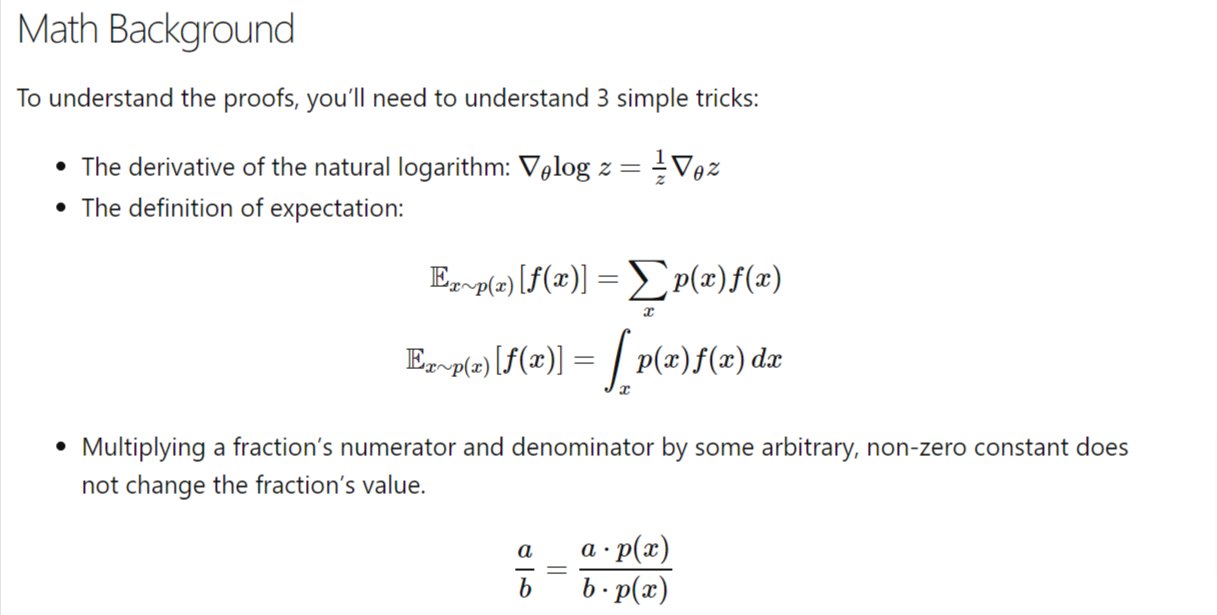

In [2]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
Image.open('drive/MyDrive/images/200624_rl.png')

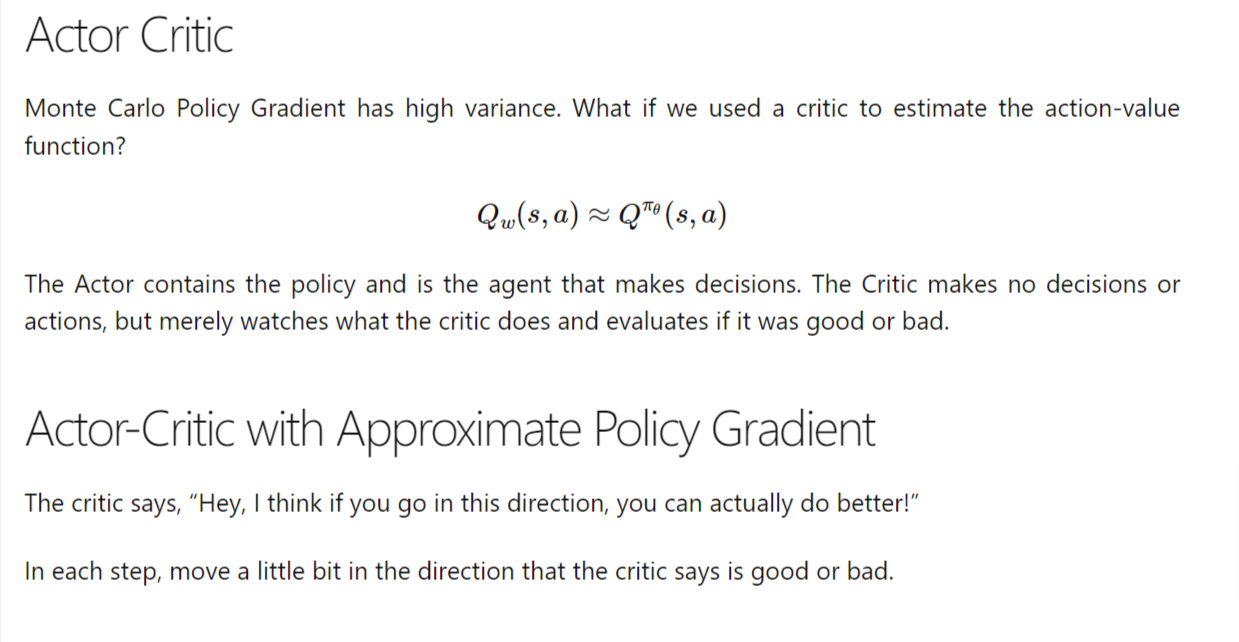

In [4]:
Image.open('drive/MyDrive/images/200624_rl2.png')

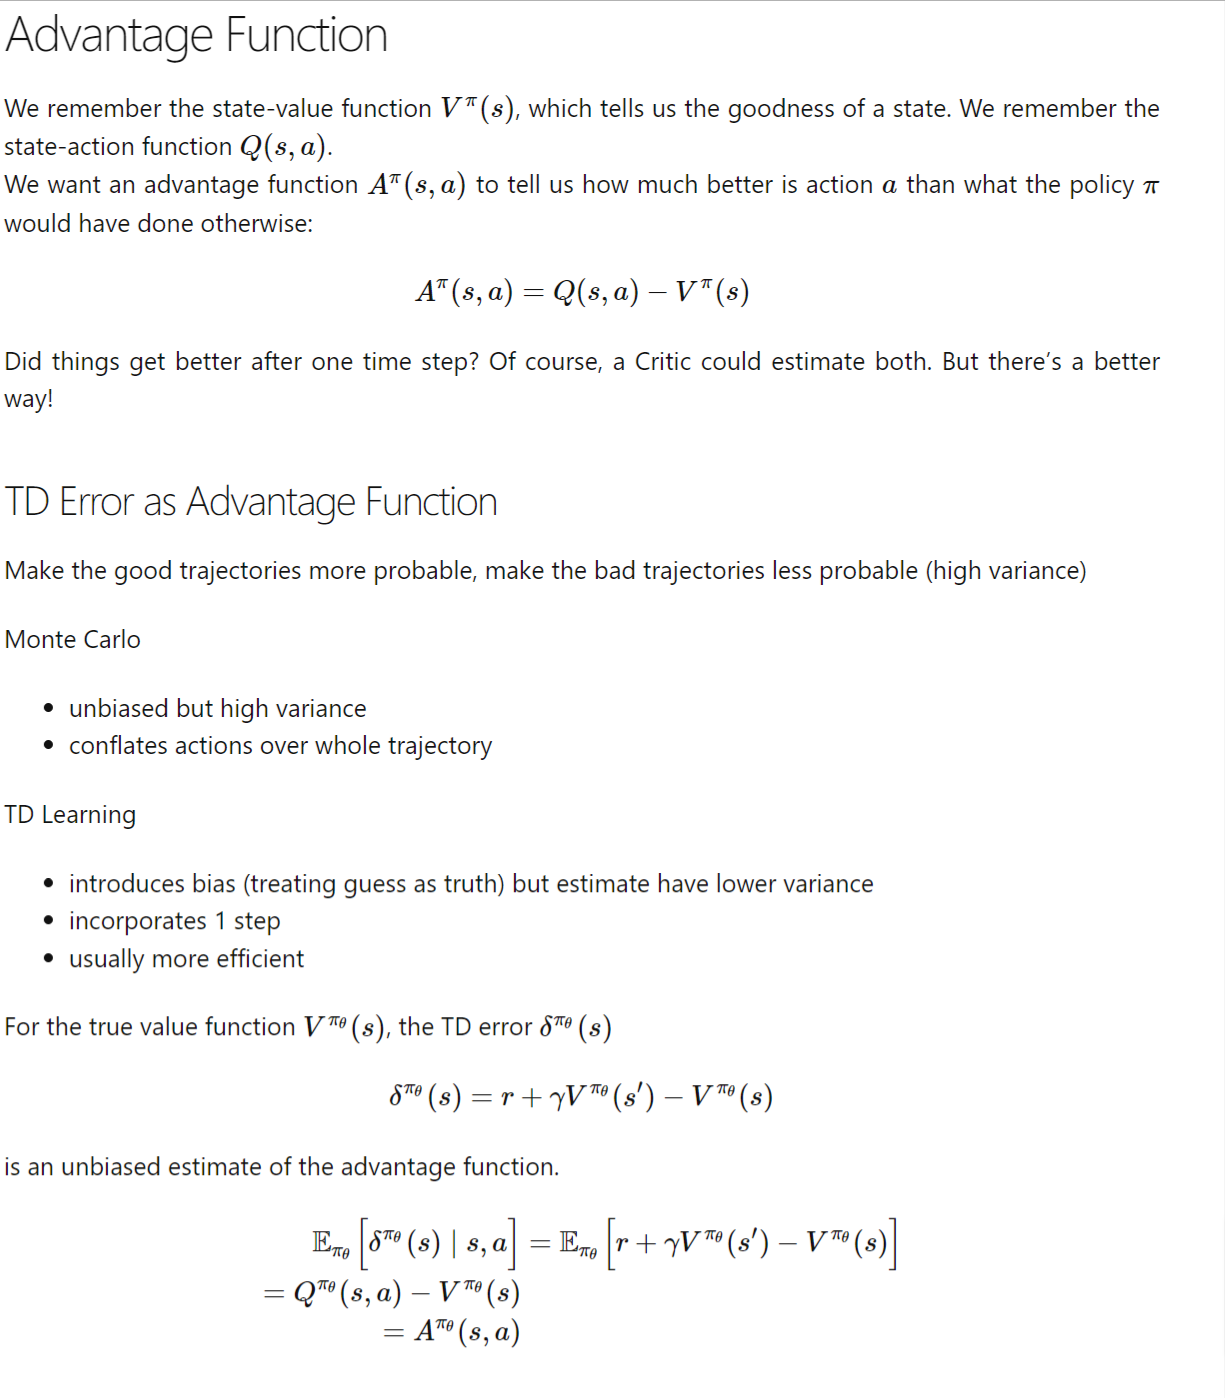

In [6]:
Image.open('drive/MyDrive/images/200624_rl3.png')

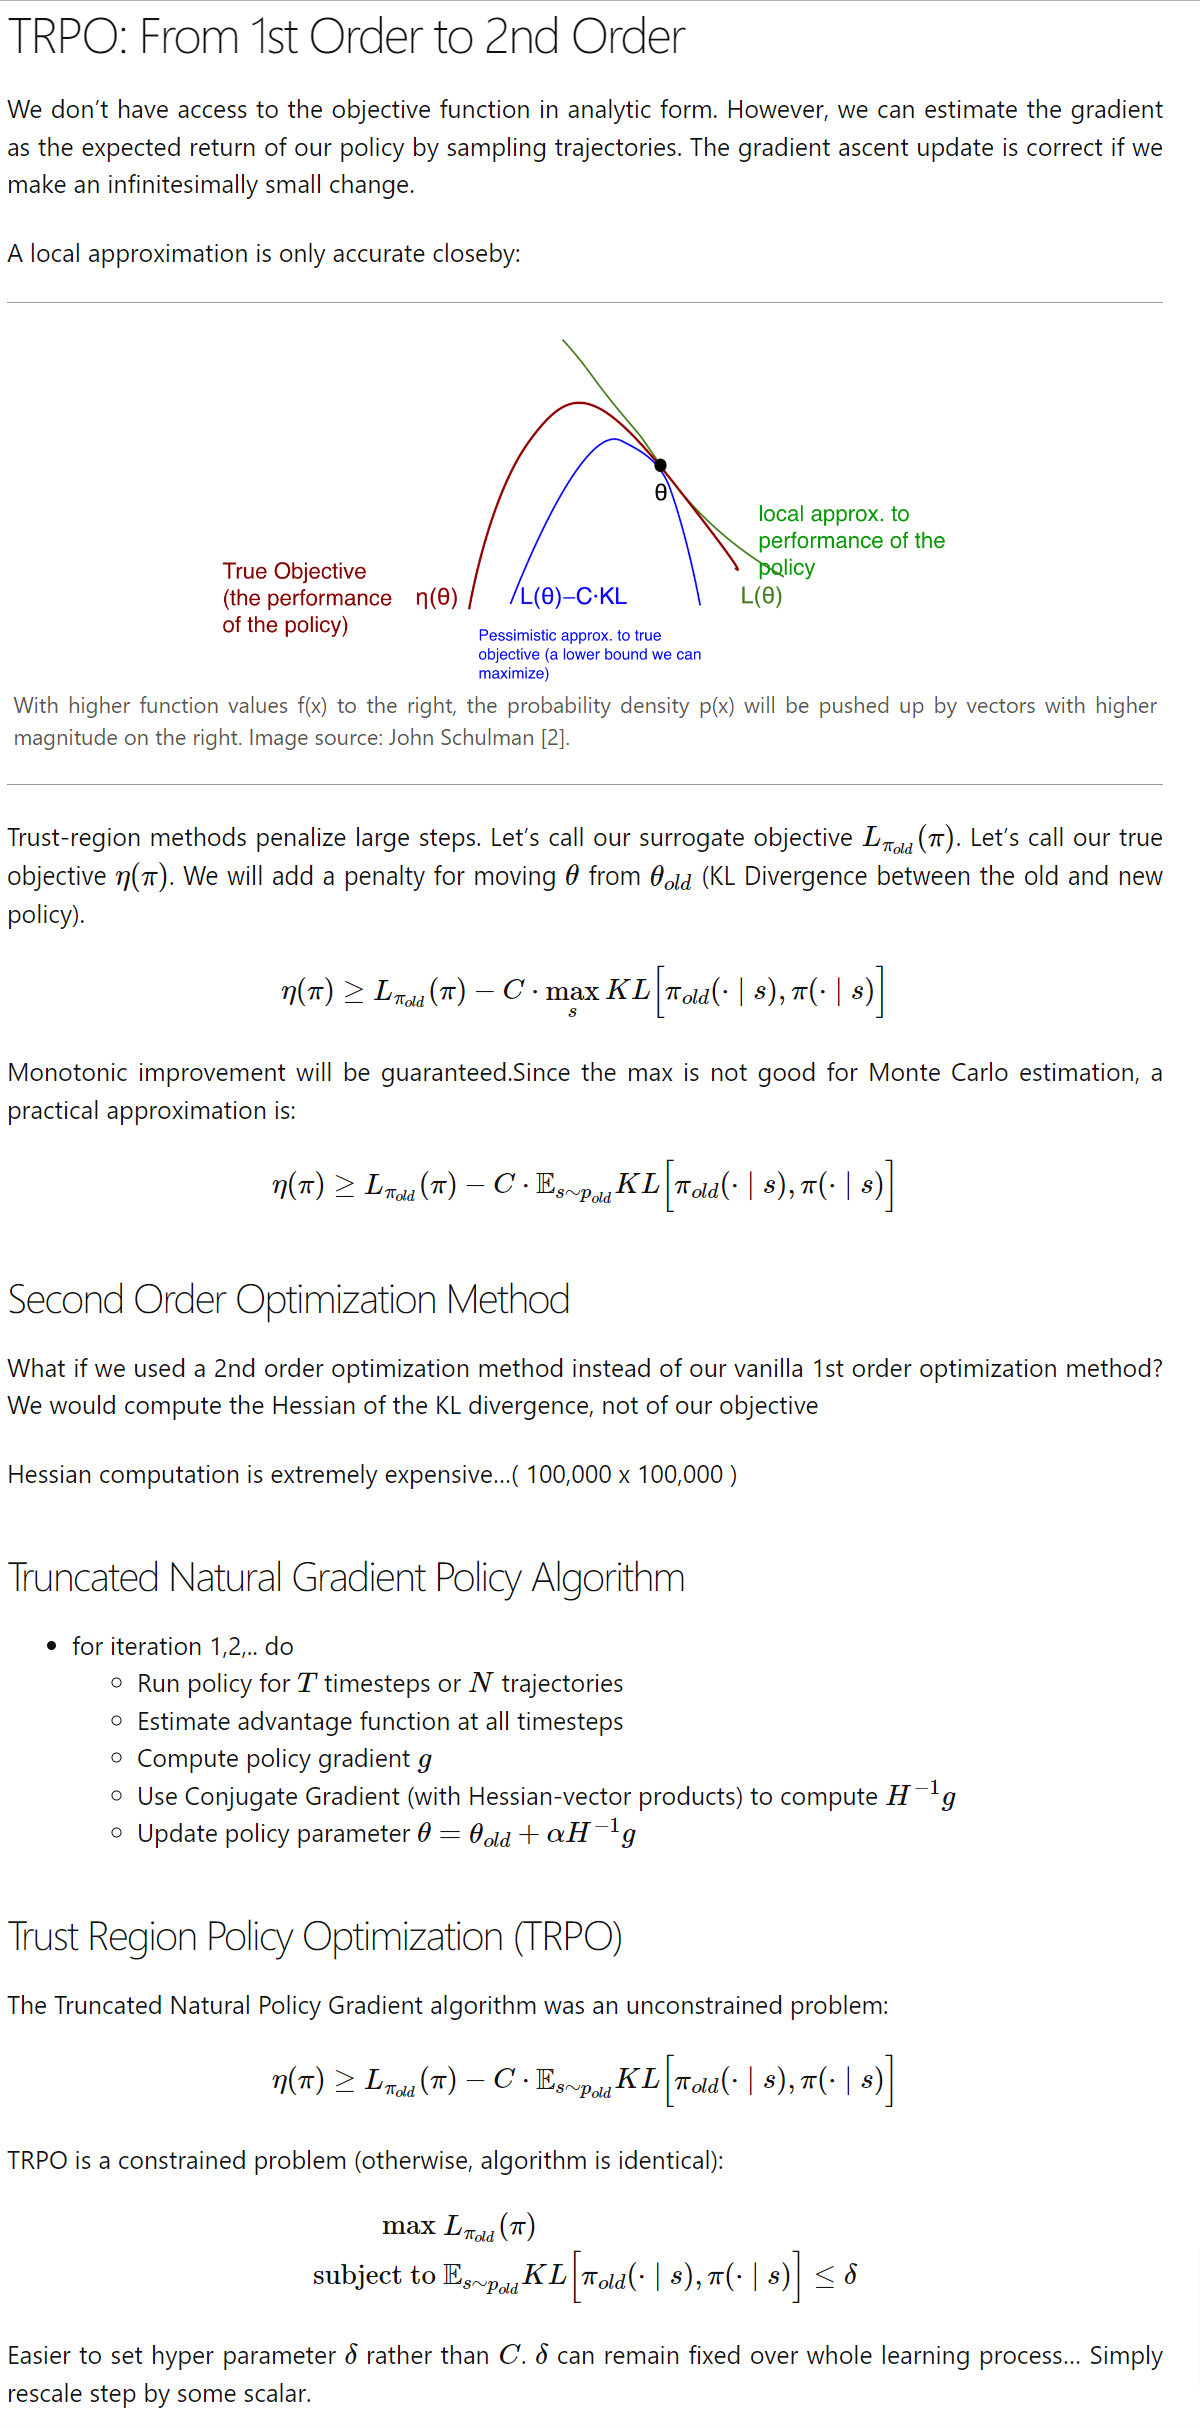

In [7]:
Image.open('drive/MyDrive/images/200624_rl4.png')